# Dash Project

**Data sorce:**
[USGS Earthquake API](https://earthquake.usgs.gov/fdsnws/event/1/?ref=springboard)

In [1]:
import requests
import json
import pandas as pd
import datetime

def earthquake(path, starttime, endtime, alert):
    paramss = {"format": "geojson", "starttime": starttime, "endtime": endtime, "alertlevel": alert}
    data = requests.get(path, params = paramss)
    data = json.loads(data.text)
    return data

path = r"https://earthquake.usgs.gov/fdsnws/event/1/query?"
green = earthquake(path, '2010-01-01', '2021-10-1', 'green')
yellow = earthquake(path, '2010-01-01', '2021-10-1', 'yellow')
orange = earthquake(path, '2010-01-01', '2021-10-1', 'orange')
red = earthquake(path, '2010-01-01', '2021-10-1', 'red')
'''
for i in (data["features"]):
    print(i["properties"]["time"], i["properties"]["place"], 
    i["properties"]["cdi"], i["properties"]["tsunami"])

'''


'\nfor i in (data["features"]):\n    print(i["properties"]["time"], i["properties"]["place"], \n    i["properties"]["cdi"], i["properties"]["tsunami"])\n\n'

In [2]:
df_green = pd.json_normalize(green['features'])
df_yellow = pd.json_normalize(yellow['features'])
df_orange = pd.json_normalize(orange['features'])
df_red = pd.json_normalize(red['features'])

In [3]:
df = pd.concat([df_green, df_yellow, df_orange, df_red])

time_in_millis = df_green['properties.time'][1]
dt = datetime.datetime.fromtimestamp(time_in_millis // 1000.0)

def refactor_date(row):
    actual_value = row['properties.time']
    actual_time = datetime.datetime.fromtimestamp(actual_value // 1000.0)
    row['properties.time'] = actual_time
    return row

df = df.apply(refactor_date, axis='columns')
df.head()

,type,id,properties.mag,properties.place,properties.time,properties.updated,properties.tz,properties.url,properties.detail,properties.felt,...,properties.types,properties.nst,properties.dmin,properties.rms,properties.gap,properties.magType,properties.type,properties.title,geometry.type,geometry.coordinates
0,Feature,us6000fq2d,6.1,"244 km NNW of Nanao, Japan",2021-09-29 02:37:05,1635334055001,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,57.0,...,",dyfi,ground-failure,internal-moment-tensor,in...",NaN,3.206,0.82,13.0,mww,earthquake,"M 6.1 - 244 km NNW of Nanao, Japan",Point,"[135.4444, 38.8937, 364]"
1,Feature,us7000fen1,5.7,"14 km W of Gulod, Philippines",2021-09-26 11:12:05,1636303330544,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,211.0,...,",dyfi,internal-moment-tensor,internal-origin,l...",NaN,8.393,1.24,24.0,mww,earthquake,"M 5.7 - 14 km W of Gulod, Philippines",Point,"[120.5035, 13.8625, 83]"
2,Feature,us7000feij,5.2,South Sandwich Islands region,2021-09-25 22:23:16,1634942309205,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",losspager,origin,phase-data,shakemap,",NaN,7.462,1.10,48.0,mww,earthquake,M 5.2 - South Sandwich Islands region,Point,"[-25.729, -58.7857, 64.27]"
3,Feature,us7000feai,5.8,south of Africa,2021-09-24 23:21:32,1633842123082,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,2.0,...,",dyfi,internal-origin,losspager,moment-tensor,...",NaN,20.236,0.62,44.0,mww,earthquake,M 5.8 - south of Africa,Point,"[23.5583, -53.4197, 7]"
4,Feature,us7000fe2z,5.4,"Nicobar Islands, India region",2021-09-24 09:04:15,1635094389550,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,1.0,...,",dyfi,internal-moment-tensor,losspager,origin,...",NaN,4.348,1.17,37.0,mww,earthquake,"M 5.4 - Nicobar Islands, India region",Point,"[94.1834, 8.6251, 10]"


In [4]:
df.shape

(6859, 30)

In [5]:
df2 = df[['id', 'properties.mag', 'properties.place', 'properties.time', 'properties.detail', \
'properties.felt', 'properties.cdi', 'properties.mmi', 'properties.alert', 'properties.tsunami', \
'properties.sig', 'properties.net', 'properties.dmin', 'properties.type', 'geometry.coordinates']]
df2.set_axis(['id', 'magnitude', 'location', 'time', 'detail', 'felt', 'cdi', 'mmi', 'alert', 'tsunami', 'sig', 'net', 'dmin', 'type', 'coordinates'], axis=1, inplace=True)
df2.head()

,id,magnitude,location,time,detail,felt,cdi,mmi,alert,tsunami,sig,net,dmin,type,coordinates
0,us6000fq2d,6.1,"244 km NNW of Nanao, Japan",2021-09-29 02:37:05,https://earthquake.usgs.gov/fdsnws/event/1/que...,57.0,5.6,2.937,green,0,604,us,3.206,earthquake,"[135.4444, 38.8937, 364]"
1,us7000fen1,5.7,"14 km W of Gulod, Philippines",2021-09-26 11:12:05,https://earthquake.usgs.gov/fdsnws/event/1/que...,211.0,6.1,5.309,green,0,629,us,8.393,earthquake,"[120.5035, 13.8625, 83]"
2,us7000feij,5.2,South Sandwich Islands region,2021-09-25 22:23:16,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,3.851,green,0,416,us,7.462,earthquake,"[-25.729, -58.7857, 64.27]"
3,us7000feai,5.8,south of Africa,2021-09-24 23:21:32,https://earthquake.usgs.gov/fdsnws/event/1/que...,2.0,1.0,0.000,green,0,518,us,20.236,earthquake,"[23.5583, -53.4197, 7]"
4,us7000fe2z,5.4,"Nicobar Islands, India region",2021-09-24 09:04:15,https://earthquake.usgs.gov/fdsnws/event/1/que...,1.0,2.0,3.788,green,0,449,us,4.348,earthquake,"[94.1834, 8.6251, 10]"


In [6]:
df2.shape

(6859, 15)

In [7]:
df2[['latitud', 'longitud', 'depth']] = pd.DataFrame(df2.coordinates.tolist(), index= df2.index) 

C:\Users\demc9\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [8]:
df2.head()

,id,magnitude,location,time,detail,felt,cdi,mmi,alert,tsunami,sig,net,dmin,type,coordinates,latitud,longitud,depth
0,us6000fq2d,6.1,"244 km NNW of Nanao, Japan",2021-09-29 02:37:05,https://earthquake.usgs.gov/fdsnws/event/1/que...,57.0,5.6,2.937,green,0,604,us,3.206,earthquake,"[135.4444, 38.8937, 364]",135.4444,38.8937,364.00
1,us7000fen1,5.7,"14 km W of Gulod, Philippines",2021-09-26 11:12:05,https://earthquake.usgs.gov/fdsnws/event/1/que...,211.0,6.1,5.309,green,0,629,us,8.393,earthquake,"[120.5035, 13.8625, 83]",120.5035,13.8625,83.00
2,us7000feij,5.2,South Sandwich Islands region,2021-09-25 22:23:16,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,3.851,green,0,416,us,7.462,earthquake,"[-25.729, -58.7857, 64.27]",-25.7290,-58.7857,64.27
3,us7000feai,5.8,south of Africa,2021-09-24 23:21:32,https://earthquake.usgs.gov/fdsnws/event/1/que...,2.0,1.0,0.000,green,0,518,us,20.236,earthquake,"[23.5583, -53.4197, 7]",23.5583,-53.4197,7.00
4,us7000fe2z,5.4,"Nicobar Islands, India region",2021-09-24 09:04:15,https://earthquake.usgs.gov/fdsnws/event/1/que...,1.0,2.0,3.788,green,0,449,us,4.348,earthquake,"[94.1834, 8.6251, 10]",94.1834,8.6251,10.00


In [9]:
df2.notna().sum()

id             6859
magnitude      6857
location       6854
time           6859
detail         6859
felt           4231
cdi            4231
mmi            6859
alert          6859
tsunami        6859
sig            6859
net            6859
dmin           5549
type           6859
coordinates    6859
latitud        6859
longitud       6859
depth          6859
dtype: int64

In [10]:
df2.dtypes

id                     object
magnitude             float64
location               object
time           datetime64[ns]
detail                 object
felt                  float64
cdi                   float64
mmi                   float64
alert                  object
tsunami                 int64
sig                     int64
net                    object
dmin                  float64
type                   object
coordinates            object
latitud               float64
longitud              float64
depth                 float64
dtype: object

In [11]:
df2.felt.isna().sum()

2628

In [12]:
df2.felt = df2.felt.fillna(0)
df2.cdi = df2.cdi.fillna(0)

C:\Users\demc9\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [13]:
df2.isna().sum()

id                0
magnitude         2
location          5
time              0
detail            0
felt              0
cdi               0
mmi               0
alert             0
tsunami           0
sig               0
net               0
dmin           1310
type              0
coordinates       0
latitud           0
longitud          0
depth             0
dtype: int64

In [14]:
df2.dmin.describe()

count    5549.000000
mean        3.573648
std         5.093154
min         0.001033
25%         0.656000
50%         1.878000
75%         4.359000
max        39.934000
Name: dmin, dtype: float64

<AxesSubplot:ylabel='Frequency'>

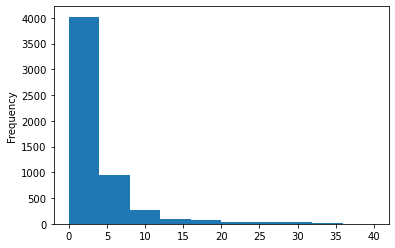

In [15]:
df2.dmin.plot(kind='hist')

In [16]:
#Se cambiaron 1400 por la mediana ya que este factor indica lo fiel de la lectura. 
df2.dmin = df2.dmin.fillna(df2.dmin.median())

C:\Users\demc9\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<AxesSubplot:ylabel='Frequency'>

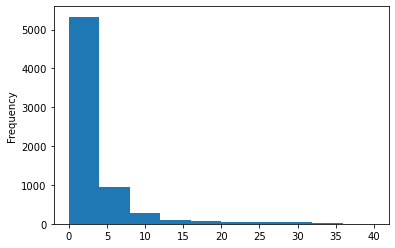

In [17]:
df2.dmin.plot(kind='hist')

In [18]:
#Se cambiaro 4 locaciones NaN 
df2.location = df2.location.fillna('Unknown')

In [19]:
df2.alert[df2.magnitude.isna()]

4579    green
4608    green
Name: alert, dtype: object

In [20]:
green_mag = df2.magnitude[df2.alert == 'green']

<AxesSubplot:ylabel='Frequency'>

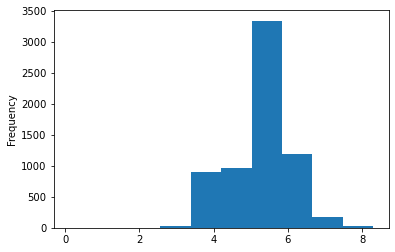

In [21]:
green_mag.plot(kind='hist')

In [22]:
#Se cambió 2 NaN en la magnitud por el promedio de magnitud en el tipo de alerta en que se encuentra
df2.magnitude = df2.magnitude.fillna(green_mag.mean())

## **2.** EDA

4 gráficas:

1) Mapa - Filtro: año 
2) Boxplot de alertas - Filtro: año , net
3) Scatter 

In [23]:
df2.head()

,id,magnitude,location,time,detail,felt,cdi,mmi,alert,tsunami,sig,net,dmin,type,coordinates,latitud,longitud,depth
0,us6000fq2d,6.1,"244 km NNW of Nanao, Japan",2021-09-29 02:37:05,https://earthquake.usgs.gov/fdsnws/event/1/que...,57.0,5.6,2.937,green,0,604,us,3.206,earthquake,"[135.4444, 38.8937, 364]",135.4444,38.8937,364.00
1,us7000fen1,5.7,"14 km W of Gulod, Philippines",2021-09-26 11:12:05,https://earthquake.usgs.gov/fdsnws/event/1/que...,211.0,6.1,5.309,green,0,629,us,8.393,earthquake,"[120.5035, 13.8625, 83]",120.5035,13.8625,83.00
2,us7000feij,5.2,South Sandwich Islands region,2021-09-25 22:23:16,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.0,0.0,3.851,green,0,416,us,7.462,earthquake,"[-25.729, -58.7857, 64.27]",-25.7290,-58.7857,64.27
3,us7000feai,5.8,south of Africa,2021-09-24 23:21:32,https://earthquake.usgs.gov/fdsnws/event/1/que...,2.0,1.0,0.000,green,0,518,us,20.236,earthquake,"[23.5583, -53.4197, 7]",23.5583,-53.4197,7.00
4,us7000fe2z,5.4,"Nicobar Islands, India region",2021-09-24 09:04:15,https://earthquake.usgs.gov/fdsnws/event/1/que...,1.0,2.0,3.788,green,0,449,us,4.348,earthquake,"[94.1834, 8.6251, 10]",94.1834,8.6251,10.00


In [24]:
import plotly.express as px

In [25]:
fig = px.box(df2, x = 'alert', y = 'magnitude', color='alert', color_discrete_sequence=['green', '#d6c800', '#fa9602', 'red'])
fig.show()

In [26]:
temp = df2
temp.index = temp.time 
df_temp = temp.groupby(pd.Grouper(freq='M')).median().reset_index()
px.line(df_temp, x = 'time', y = 'magnitude', hover_data=['felt'])

In [27]:
px.scatter(df2, x = 'time', y = 'magnitude', color='alert', size='cdi')

In [28]:
df2[df2.type == 'nuclear explosion']

,id,magnitude,location,time,detail,felt,cdi,mmi,alert,tsunami,sig,net,dmin,type,coordinates,latitud,longitud,depth
time,,,,,,,,,,,,,,,,,,
2017-09-02 21:30:01,us2000aert,6.3,"21 km ENE of S?ngjibaegam, North Korea",2017-09-02 21:30:01,https://earthquake.usgs.gov/fdsnws/event/1/que...,43.0,7.8,5.85,green,0,644,us,3.309,nuclear explosion,"[129.0297, 41.3324, 0]",129.0297,41.3324,0.0


In [29]:
fig = px.strip(df2, x = 'type', y = 'magnitude', color='type', height=1000, hover_data=['location', 'time'])

fig.update_traces(marker=dict(
    size=12,
    line= dict(width=2,
                color='DarkSlateGrey')
))

In [30]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Scattergeo(
        lon = df2.latitud,
        lat = df2.longitud,
        text = df2.location,
        mode = 'markers',
        marker_color = df2.alert
        ))
fig.show()

In [31]:
fig = px.density_mapbox(df2, lat='longitud', lon='latitud', z='magnitude', radius=6,
                        center=dict(lat=7, lon=37), zoom=0.5,
                        mapbox_style="stamen-terrain")
fig.show()